# CLIMADA DEMO

Prepared by G. Aznar Siguan

The functionality of climada is gathered in the following classes:
* Entity: socio-economic models
  * Exposures: exposed values
    * BlackMarble: regional economic model from nightlight intensities and economic indicators (GDP, income group)
  * ImpactFuncSet: collection of impact functions per hazard
    * ImpactFunc: one adjustable impact function
    * IFTropCyclone: definition of impact functions for tropical cyclones
  * DiscRates: discount rates per year
  * MeasureSet: collection of measures for adaptation
* Hazard: meteorological models
  * TropCyclone: tropical cyclone events
* Impact: impacts of the Hazard and Entity interaction.

Using these classes, currently climada is able to:
* read files containing already modelled data, as for instance products of the climada MATLAB code. 
* visualize and analyse the meteorological and socio-economic data.
* compute the socio-economic impact of the natural catastrophe events. 
* model tropical cyclones from the [IBTrACS](https://www.ncdc.noaa.gov/ibtracs/) tracks repository and generate synthetic ones.
* model country or regional exposures using the black marble approximation.

# Case: Hurricane Andrew (Florida 1992)

## Entity

The entity class is just a container for the exposures, impact functions, discount rates and measures. It can be directly filled from an excel file following climada's template or from MATLAB files of the climada MATLAB version. The excel template can be found in `climada_python/data/system/entity_template.xlsx`.

In [1]:
from climada.entity import Entity
from climada.util.constants import ENT_TEMPLATE_XLS

# for this example we use the same template. You might just fill your excel file and store it locally elsewhere.
ent_file = ENT_TEMPLATE_XLS
# provide absolute path of file following template. 
ent_fl = Entity()
ent_fl.read_excel(ent_file)

2019-01-23 09:25:30,606 - climada - DEBUG - Loading default config file: /Users/aznarsig/Documents/Python/climada_python/climada/conf/defaults.conf


/Users/aznarsig/anaconda3/envs/climada_env_new/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


2019-01-23 09:25:33,795 - climada.entity.disc_rates.base - INFO - Reading file: /Users/aznarsig/Documents/Python/climada_python/data/system/entity_template.xlsx
2019-01-23 09:25:33,834 - climada.entity.impact_funcs.impact_func_set - INFO - Reading file: /Users/aznarsig/Documents/Python/climada_python/data/system/entity_template.xlsx
2019-01-23 09:25:33,893 - climada.entity.measures.measure_set - INFO - Reading file: /Users/aznarsig/Documents/Python/climada_python/data/system/entity_template.xlsx


The `impact_funcs` attribute is of type `ImpactFuncSet`. As such, it contains different impact functions for different hazards:

List of impact function's ids for every hazard type:
{'TC': [1, 3], 'TS': [1], 'WS': [1], 'EQ': [1], 'VQ': [1], 'TR': [1], 'LS': [1], 'FL': [1], 'HS': [1], 'BF': [1]}

Impact functions graphs:


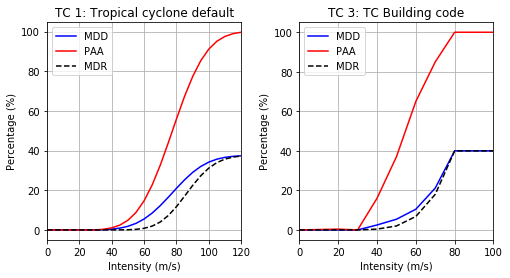

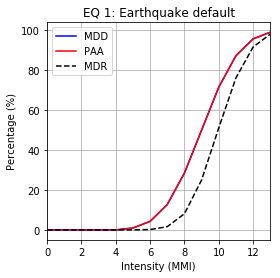

In [2]:
%matplotlib inline
print("List of impact function's ids for every hazard type:")
print(ent_fl.impact_funcs.get_ids()) # List of impact function's ids for every hazard type
print('\nImpact functions graphs:')
ent_fl.impact_funcs.plot('TC'); # tropical cyclone impact functions
ent_fl.impact_funcs.plot('EQ'); # earthquake impact functions

Information and exercises about impact functions, numpy and matplotlib in [Impact Functions](2_impfuncs_np_mpl.ipynb#climada-I:-Impact-Functions-(using-numpy and-matplotlib).

The `measures` attribute is of type `MeasureSet`. This class is a container of `Measure` instances, the same as `ImpactFuncSet` containing several `ImpactFunc`. This class is not used for impact calculations, but for building adaptation strategies:

In [3]:
help(ent_fl.measures)

Help on MeasureSet in module climada.entity.measures.measure_set object:

class MeasureSet(builtins.object)
 |  Contains measures of type Measure. Loads from
 |  files with format defined in FILE_EXT.
 |  
 |  Attributes:
 |      tag (Tag): information about the source data
 |      _data (dict): cotains Measure classes. It's not suppossed to be
 |          directly accessed. Use the class methods instead.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, file_name='', description='')
 |      Fill values from file, if provided.
 |      
 |      Parameters:
 |          file_name (str or list(str), optional): absolute file name(s) or
 |              folder name containing the files to read
 |          description (str or list(str), optional): one description of the
 |              data or a description of each data file
 |      
 |      Raises:
 |          ValueError
 |      
 |      Examples:
 |          Fill MeasureSet with values and check consistency data:
 |      
 |          >>

The `disc_rates` attribute is of type `DiscRates` and it simply contains the discount rates for every year:

(<Figure size 288x288 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x1a11c9c198>])

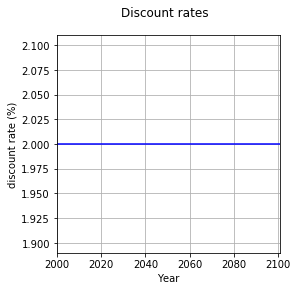

In [4]:
ent_fl.disc_rates.plot()

Finally, the `exposures` attribute contains geolocalized values of anything exposed to the hazard, let it be monetary value of assets or number of human lifes, for example. It is of type `Exposures`. 

In this case, we want to fix the exposures for the assets located in Florida. We will use the data of the MATLAB file `ENT_FL_MAT`.

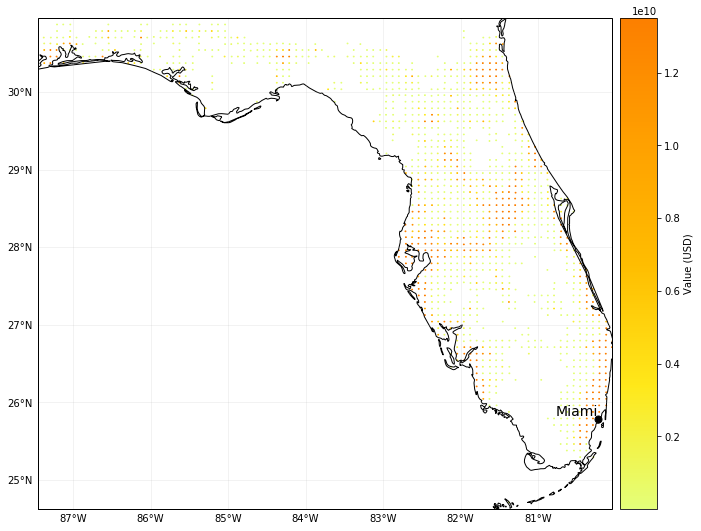

In [5]:
from climada.entity import Exposures
from climada.util import ENT_FL_MAT

ent_fl.exposures = Exposures()
ent_fl.exposures.read_mat(ENT_FL_MAT)
# fix value unit
ent_fl.exposures.value_unit = 'USD'
# set defined impact function as impact function of tropical cyclones
ent_fl.exposures.rename(columns={'if_': 'if_TC'}, inplace=True)
ent_fl.exposures.plot_hexbin(ignore_zero=True);

The detailed description of the `Exposures` class can be found in [Exposures](climada_entity_exposures.ipynb#Exposures-class).

Furthermore, any country or region can be modelled using the black marble methodology of the `BlackMarble` class. This is explained in [Black Marble](climada_entity_BlackMarble.ipynb).

Every class has a `check()` method. This verifies that the necessary data to compute the impact is correctly provided and logs the optional variables that are not present. Use it always after completing the class definition.

In [6]:
ent_fl.check() # checks exposures, impact functions, discount rates and measures

2019-01-23 09:25:38,134 - climada.entity.exposures.base - INFO - geometry not set.
2019-01-23 09:25:38,136 - climada.entity.exposures.base - INFO - category_id not set.
2019-01-23 09:25:38,138 - climada.entity.exposures.base - INFO - region_id not set.


## Hazard tropical cyclone

### Centroids

The `Centroids` class contains the geographical coordinates where the hazard is defined. A `Centroids` instance provides each coordinate with an id and can't contain two identical coordinates. 

In this example, we will build a grid that covers Florida and the hurricane Andrew. This can be done like that:

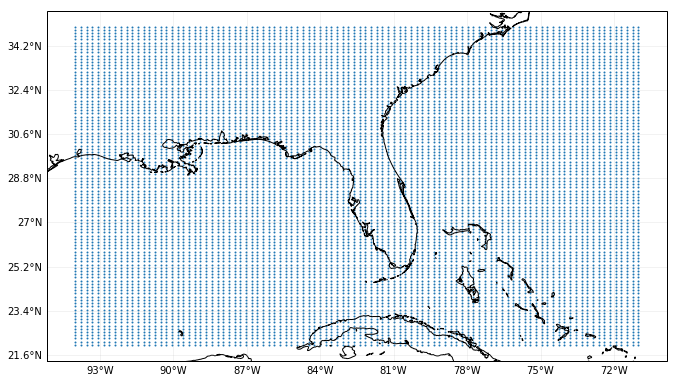

In [7]:
import numpy as np
from climada.hazard import Centroids
cent_fl = Centroids()
cent_fl.coord = (np.mgrid[22 : 35 : complex(0, 100), -94 : -71 : complex(0, 100)]).reshape(2, 10000).transpose()
cent_fl.id = np.arange(cent_fl.lat.size)
cent_fl.plot();

See [Centroids](3_exp_centr_pd_crt.ipynb#Centroids-class).

### TropCyclone

Tropical cyclones can be modelled from historical event tracks, in particular from [IBTrACS](https://www.ncdc.noaa.gov/ibtracs/) data. The tracks can be loaded and manipulated with `TCTracks` class. This generates as well synthetic events from the historical ones. 

`TC_ANDREW_FL` file contains the IBrTRACS track of hurricane Andrew in 1992 over Florida.

In [8]:
from climada.hazard import TCTracks, TropCyclone
from climada.util import TC_ANDREW_FL

In [9]:
help(TCTracks)

Help on class TCTracks in module climada.hazard.tc_tracks:

class TCTracks(builtins.object)
 |  Contains tropical cyclone tracks.
 |  
 |  Attributes:
 |      data (list(xarray.Dataset)): list of tropical cyclone tracks. Each
 |          track contains following attributes:
 |              - time (coords)
 |              - lat (coords)
 |              - lon (coords)
 |              - time_step
 |              - radius_max_wind
 |              - max_sustained_wind
 |              - central_pressure
 |              - environmental_pressure
 |              - max_sustained_wind_unit (attrs)
 |              - central_pressure_unit (attrs)
 |              - name (attrs)
 |              - orig_event_flag (attrs)
 |              - data_provider (attrs)
 |              - basin (attrs)
 |              - id_no (attrs)
 |              - category (attrs)
 |          computed during processing:
 |              - on_land
 |              - dist_since_lf
 |  
 |  Methods defined here:
 |  
 |  __init__

2019-01-23 09:25:41,837 - climada.hazard.tc_tracks - INFO - Reading /Users/aznarsig/Documents/Python/climada_python/data/demo/ibtracs_global_intp-None_1992230N11325.csv
2019-01-23 09:25:43,650 - climada.hazard.tc_tracks - INFO - Computing 12 synthetic tracks.
2019-01-23 09:25:46,891 - climada.hazard.tc_tracks - DEBUG - No historical track of category Tropical Depression. Decay parameters from category Hurrican Cat. 4 taken.
2019-01-23 09:25:46,893 - climada.hazard.tc_tracks - DEBUG - No historical track of category Tropical Storm. Decay parameters from category Hurrican Cat. 4 taken.
2019-01-23 09:25:46,893 - climada.hazard.tc_tracks - DEBUG - No historical track of category Hurrican Cat. 1. Decay parameters from category Hurrican Cat. 4 taken.
2019-01-23 09:25:46,894 - climada.hazard.tc_tracks - DEBUG - No historical track of category Hurrican Cat. 2. Decay parameters from category Hurrican Cat. 4 taken.
2019-01-23 09:25:46,895 - climada.hazard.tc_tracks - DEBUG - No historical track 

(<Figure size 648x936 with 1 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x1a213ba978>)

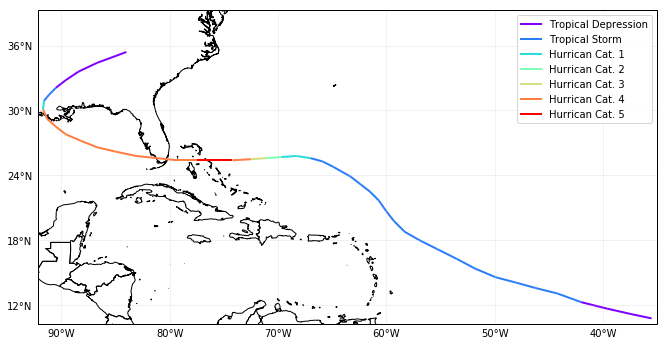

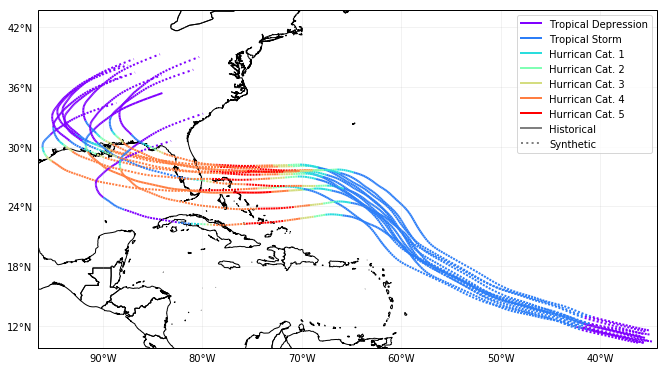

In [10]:
track_andrew = TCTracks()
track_andrew.read_ibtracs_csv(TC_ANDREW_FL)
track_andrew.plot() # plot track

track_andrew.calc_random_walk(ens_size=12) # For every track, generate 12 synthetic
print('Number of tracks:', track_andrew.size)

track_andrew.equal_timestep() # Generate equally distributed points
track_andrew.plot()

`TropCyclone` class ingests the tracks and models the wind gusts in the provided centroids.

2019-01-23 09:25:52,985 - climada.hazard.trop_cyclone - INFO - Mapping 13 tracks to 10000 centroids.
2019-01-23 09:25:59,480 - climada.hazard.trop_cyclone - DEBUG - Append events.
2019-01-23 09:25:59,521 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


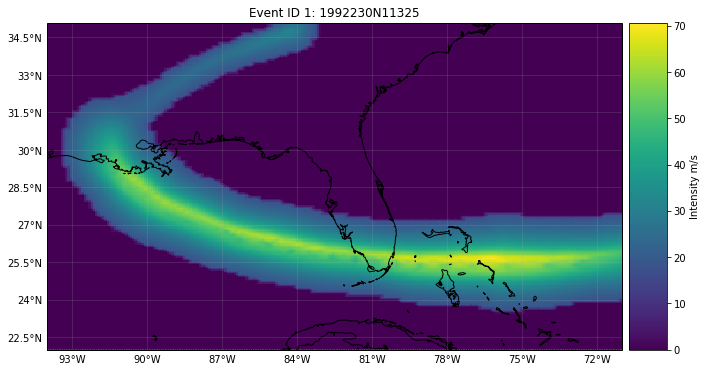

In [11]:
tc_andrew = TropCyclone() # instance TropCyclone
tc_andrew.set_from_tracks(track_andrew, centroids=cent_fl) # set hazard from track file with given centroids

tc_andrew.plot_intensity(1); # plot intensity of one event

A more completed set of tropical cyclones events in Florida can be found in file `HAZ_DEMO_MAT`. This contains 1445 historical events from year 1851 to 2011 and 9 synthetical events for each historical one.

In [12]:
from climada.util import HAZ_DEMO_MAT
tc_fl = TropCyclone()
tc_fl.read(HAZ_DEMO_MAT, 'Historic and synthetic tropical cyclones in Florida from 1851 to 2011.')

2019-01-23 09:26:02,490 - climada.hazard.base - INFO - Reading file: /Users/aznarsig/Documents/Python/climada_python/data/demo/atl_prob.mat
2019-01-23 09:26:02,546 - climada.hazard.centroids.base - INFO - Reading file: /Users/aznarsig/Documents/Python/climada_python/data/demo/atl_prob.mat
2019-01-23 09:26:02,582 - climada.util.checker - DEBUG - Centroids.region_id not set. 
2019-01-23 09:26:09,334 - climada.util.checker - DEBUG - Hazard.category not set. 


There are two events called `ANDREW` that took place in Florida:

The first ANDREW happened in 1986-06-05
The second ANDREW happened in 1992-08-16


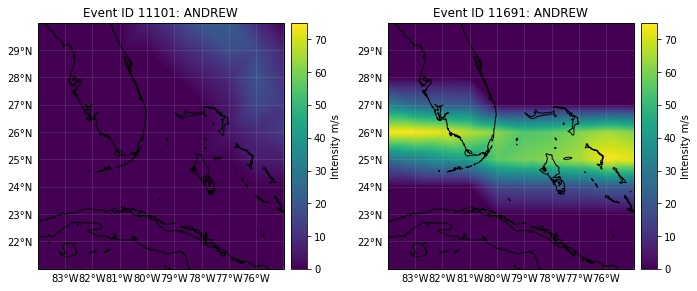

In [13]:
print('The first ANDREW happened in', tc_fl.get_event_date('ANDREW')[0])
print('The second ANDREW happened in', tc_fl.get_event_date('ANDREW')[1])
tc_fl.plot_intensity(event='ANDREW'); # Plot all ANDREW events

In a specific point, for example (lat, lon) = (26, -81), the tropical cyclones have had the following maximum intensities:

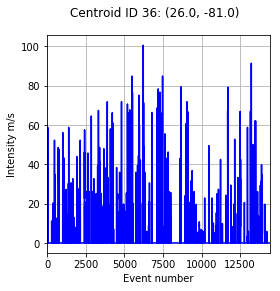

In [14]:
tc_fl.plot_intensity(centr=(26, -81));

Also, the intensity maps for different return periods can be representative for such an amount of events:

2019-01-23 09:26:15,031 - climada.hazard.base - INFO - Computing exceedance intenstiy map for return periods: [ 25  50 100 250]


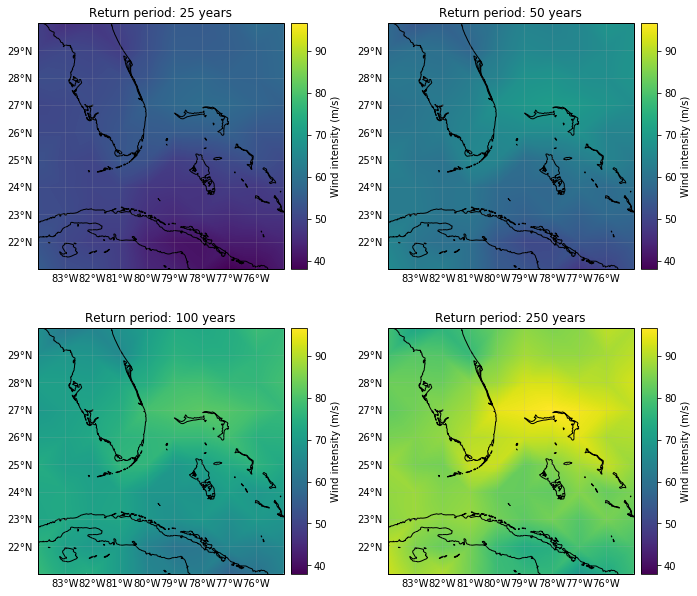

In [15]:
_ = tc_fl.plot_rp_intensity()

To see how the `TropCyclone` class works, see [Hazard and TC](4_hzd_tc_xr_pint.ipynb#climada-III:-Hazard-and-TropicCyclone-(using-xarray-and-pint), where the `Hazard` class and `trop_cyclone` module are explained, as well as the xarray and pint libraries.

## Impact

The impact of hazard events over an entity can be computed easily from the previously explained classes. By computing the impact for each event (historical and synthetic), the `Impact` class provides different risk measures, as the expected annual impact per exposure, the probable maximum impact for different return periods and the total average annual impact.

This is the impact of scenario ANDREW in Florida. We call scenario to the historical event and its synthetic reproductions. Analyzing the scenario instead of the single historical events enables to take into account the uncertainties of such events.

The `impact` module containes a variable `MAX_SIZE`. This controls the maximum matrix size contained in a chunk. You can decrease its value if you are having memory issues when using the `Impact`'s `calc` method. A high value will make the computation fast, but increase the memory use.

2019-01-23 09:26:26,166 - climada.entity.exposures.base - INFO - Matching 118141 exposures with 10000 centroids.
2019-01-23 09:26:28,161 - climada.util.interpolation - WARNING - Distance to closest centroid is greater than 100km for 103056 coordinates.
2019-01-23 09:26:28,167 - climada.engine.impact - INFO - Calculating damage for 1301 assets (>0) and 13 events.
Expected average annual impact of an ANDREW scenario: 3.272e+09 USD


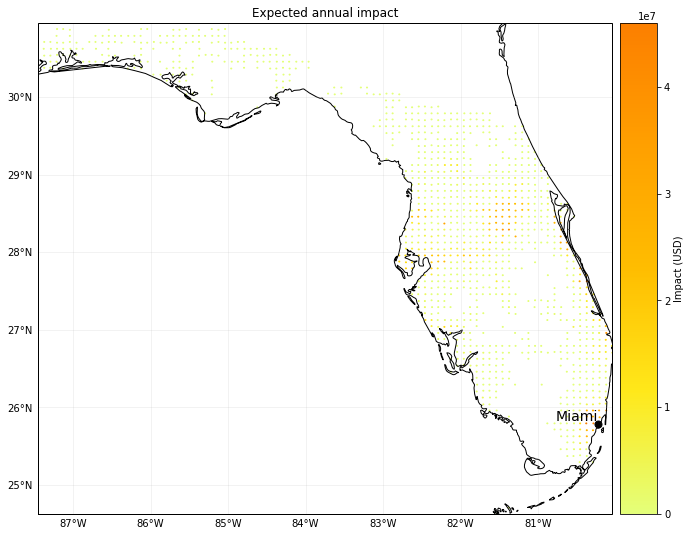

In [16]:
from climada.engine import Impact
imp_andrew = Impact()
# Compute impact of hurricane Andrew in tc_andrew over Florida entity:
imp_andrew.calc(ent_fl.exposures, ent_fl.impact_funcs, tc_andrew)
imp_andrew.plot_eai_exposure(); # average annual impact at each exposure
print('Expected average annual impact of an ANDREW scenario: {:.3e} {}'.format(imp_andrew.aai_agg, imp_andrew.unit))

If we take into account all the historical and synthetic events of tropical cyclones in Florida, the impact exceedence frequency curve can be computed and a reliable approximation of the average annual impact (aggregated) is obtained:

2019-01-23 09:26:31,251 - climada.entity.exposures.base - INFO - Matching 118141 exposures with 100 centroids.
2019-01-23 09:26:31,972 - climada.util.interpolation - WARNING - Distance to closest centroid is greater than 100km for 116336 coordinates.
2019-01-23 09:26:31,977 - climada.engine.impact - INFO - Calculating damage for 1140 assets (>0) and 14450 events.
Expected average annual impact: 5.210e+09 USD


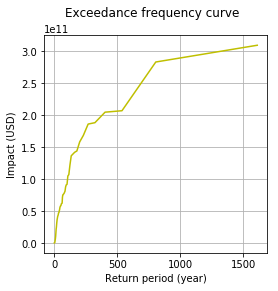

In [17]:
# remove previous assigned centroids
ent_fl.exposures.drop(['centr_TC'], axis=1, inplace=True) # delete colomn 'centr_TC'
# compute new impact
imp_fl = Impact()
# Compute impact over Florida:
imp_fl.calc(ent_fl.exposures, ent_fl.impact_funcs, tc_fl)
freq_curve_fl = imp_fl.calc_freq_curve() # impact exceedence frequency curve
freq_curve_fl.plot();
print('Expected average annual impact: {:.3e} USD'.format(imp_fl.aai_agg))

The average annual impact per exposure is:

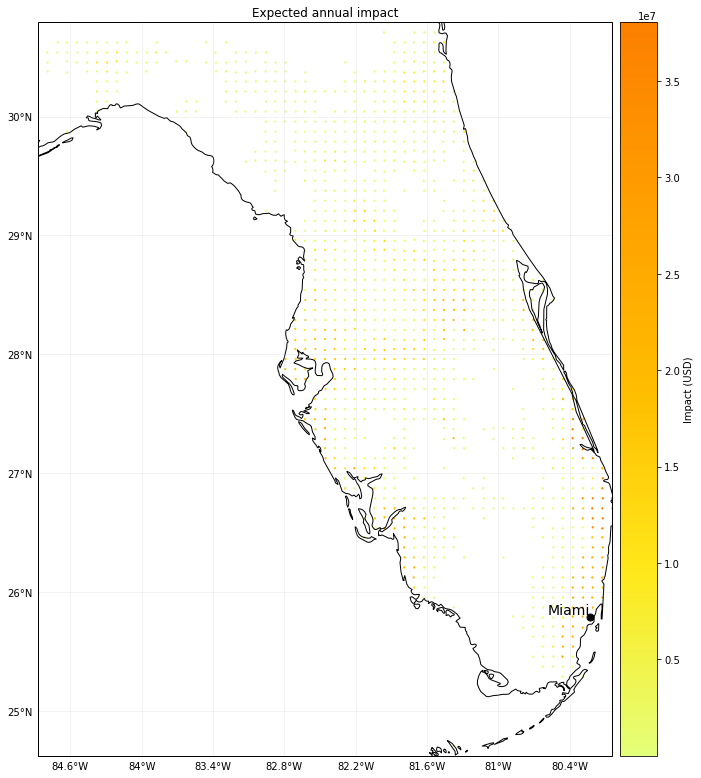

In [18]:
imp_fl.plot_eai_exposure(); # average annual impact at each exposure

Finally, we can save our variables in pickle format using the `save` function. This will save your results in the folder specified in the configuration file. The default folder is a `results` folder which is created in the current path.

In [19]:
from climada.util import save
save('impact_florida.p', imp_fl)

2019-01-23 09:26:37,002 - climada.util.save - INFO - Written file /Users/aznarsig/Documents/Python/climada_python/script/tutorial/results/impact_florida.p


Later, the data can be read as follows:

In [20]:
import pickle
import os
abs_path = os.path.join(os.getcwd(), 'results/impact_florida.p') # absolute path
with open(abs_path, 'rb') as f:
    data = pickle.load(f)

print('Data read:', type(data))

Data read: <class 'climada.engine.impact.Impact'>


# Your case

### EXERCISE:

1. Build an entity. It might be one from your previous runs in MATLAB. Make sure i'is saved in version > v7.3 if it's a MATLAB file. If it's not, you'll get an error message. Then, you can save it again in MATLAB like that:
`save('file_name.mat','variable_name', '-v7.3')`

2. Build a hazard. It might also come from a previous run in MATLAB. This file might already contain the centroids. If not, define the centroids as well and use them in your calculations.

3. Compute the impact.

4. Visualization. Plot:
   * the damage functions for the hazard
   * the entity values map
   * the strongest event intensity
   * the maximum hazard intensity of all the events in Zürich (47.38, 8.54)
   * the impact exceedence frequency curve


In [21]:
# Put your code here






2019-01-23 09:26:37,180 - climada.entity.exposures.base - INFO - tag metadata set to default value:  File: 
 Description: 
2019-01-23 09:26:37,181 - climada.entity.exposures.base - INFO - ref_year metadata set to default value: 2018
2019-01-23 09:26:37,181 - climada.entity.exposures.base - INFO - value_unit metadata set to default value: USD
2019-01-23 09:26:37,182 - climada.entity.exposures.base - INFO - centr_ not set.
2019-01-23 09:26:37,183 - climada.entity.exposures.base - INFO - geometry not set.
2019-01-23 09:26:37,183 - climada.entity.exposures.base - INFO - category_id not set.
2019-01-23 09:26:37,184 - climada.entity.exposures.base - INFO - region_id not set.
2019-01-23 09:26:37,185 - climada.entity.impact_funcs.impact_func_set - INFO - Reading file: /Users/aznarsig/Documents/Python/climada_python/data/demo/WS_Europe.xls
2019-01-23 09:26:37,293 - climada.hazard.base - INFO - Reading file: /Users/aznarsig/Documents/Python/climada_python/data/demo/WS_ERA40.mat
2019-01-23 09:26:

(<Figure size 288x288 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x1a2650f908>])

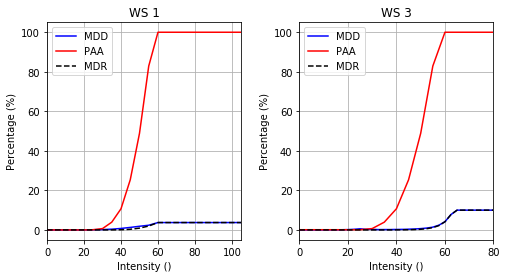

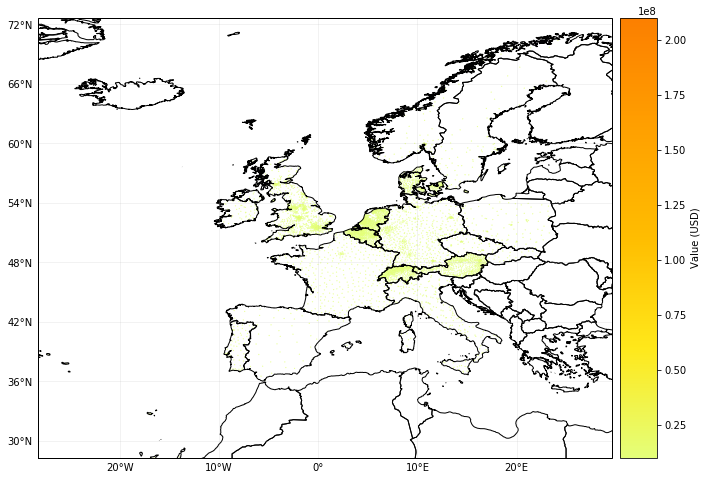

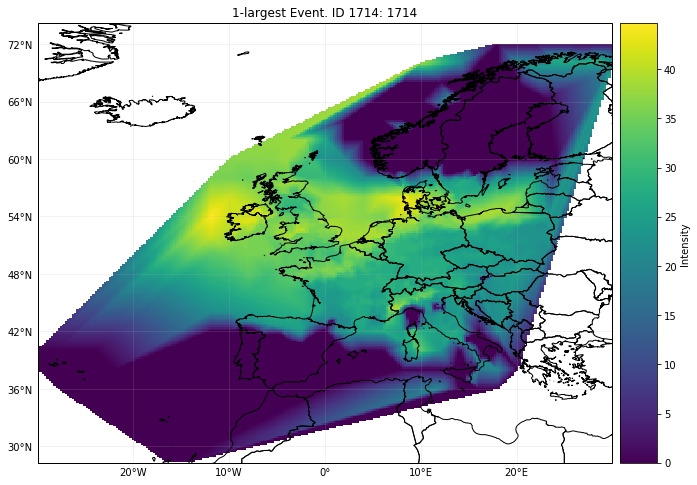

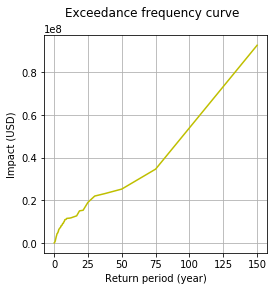

In [22]:
# SOLUTION: example: winter storms in europe
from climada.util import DATA_DIR
import pandas as pd
from climada.hazard import Hazard
from climada.entity import Exposures, ImpactFuncSet
from climada.engine import Impact

# Put any absoulte path for your files or set up the configuration variable "repository"
FILE_HAZARD = DATA_DIR + '/demo/WS_ERA40.mat' 
FILE_ENTITY = DATA_DIR + '/demo/WS_Europe.xls'

# Define hazard type
HAZ_TYPE = 'WS'

# 1. Entity: we only need impact functions and exposures to compute the impact
# Exposures
exp_ws_eu = pd.read_excel(FILE_ENTITY)
exp_ws_eu = Exposures(exp_ws_eu)
exp_ws_eu.check()

# Impact functions
impf_ws_eu = ImpactFuncSet()
var_names = impf_ws_eu.get_def_file_var_names('.xls')
var_names['col_name']['func_id'] = 'VulnCurveID'
impf_ws_eu.read(FILE_ENTITY, 'Impact functions for winter storms in EU.', var_names=var_names)

# 2. Hazard
haz_ws_eu = Hazard(HAZ_TYPE, FILE_HAZARD, 'WS EU ERA 40')

# 3. Impact
imp_ws_eu = Impact()
imp_ws_eu.calc(exp_ws_eu, impf_ws_eu, haz_ws_eu)

# 4.
# the damage functions for the hazard
impf_ws_eu.plot()

# the exposures values map
exp_ws_eu.plot_hexbin(pop_name=False)

# the strongest event
haz_ws_eu.plot_intensity(-1) # might be better to use an other earth projection?

# the impact exceedence frequency curve
imp_exc_curve = imp_ws_eu.calc_freq_curve()
imp_exc_curve.plot()